In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Audi.csv')

#### Variables in Data:-
- model
- year
- price
- transmission
- mileage
- fuelType
- tax
- mpg
- engineSize

### Data Cleaning

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.model.nunique()

26

In [7]:
df.model.shape

(10668,)

In [8]:
# Here we Have data of 26 Different Models

<AxesSubplot:>

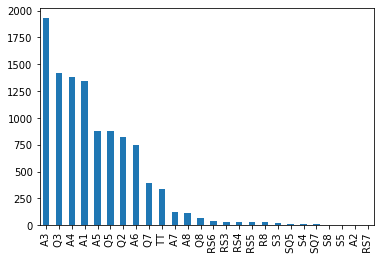

In [9]:
df.model.value_counts().plot(kind='bar')

In [10]:
df.model.value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [11]:
# I decided ot remove last four as outlier, very less in number not providing complete picture of the Particular model of car

In [12]:
# A2, RS7, S5, S8

In [13]:
df[df.model == 'A2']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [14]:
df.model = df.model.apply(lambda x : x.strip())

In [15]:
df = df[((df.model != 'A2')&(df.model != 'RS7')&(df.model != 'S8')&(df.model != 'S5'))]

In [16]:
df.shape

(10659, 9)

In [17]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [18]:
df.year.unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

In [19]:
df.year.value_counts()

2019    3197
2016    1964
2017    1933
2015     997
2018     864
2020     716
2014     445
2013     290
2012      85
2011      46
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       5
2004       5
2002       2
1997       1
1998       1
Name: year, dtype: int64

In [20]:
df = df[df.year > 2005]

In [21]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


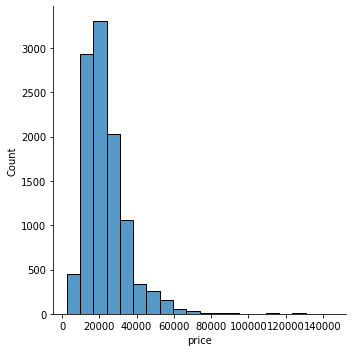

In [22]:
sns.displot(df.price,bins=20)

In [23]:
df.price.quantile(0.99)

59995.0

In [24]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,2017.131228,22932.929780,24662.673341,125.526415,50.818443,1.928558
std,2.073229,11694.952185,23253.649976,66.449284,12.926698,0.599623
min,2006.000000,2490.000000,1.000000,0.000000,19.600000,0.000000
25%,2016.000000,15250.000000,5913.000000,125.000000,40.900000,1.500000
50%,2017.000000,20250.000000,18931.500000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36354.750000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [25]:
df = df[df.price < 59995.0]

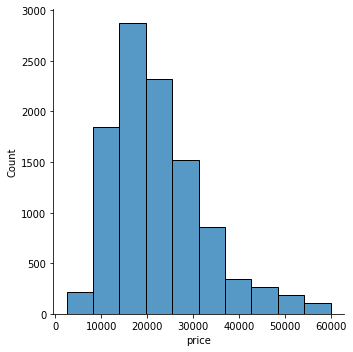

In [26]:
sns.displot(df.price,bins=10)

In [27]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [28]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

<AxesSubplot:>

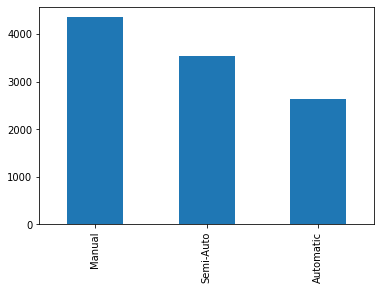

In [29]:
df.transmission.value_counts().plot(kind='bar')

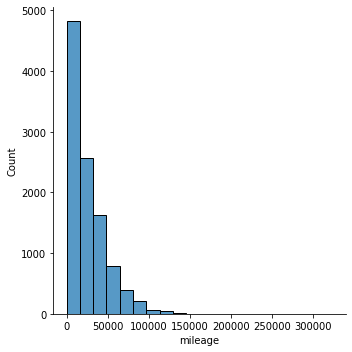

In [30]:
sns.displot(df.mileage,bins=20)

In [31]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000
mean,2017.110256,22359.373409,24851.751377,125.235518,51.030133,1.909981
std,2.071497,10040.398627,23288.359481,66.474891,12.812385,0.567570
min,2006.000000,2490.000000,5.000000,0.000000,19.600000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19210.000000,145.000000,49.600000,2.000000
75%,2019.000000,27850.000000,36549.500000,145.000000,58.900000,2.000000
max,2020.000000,59990.000000,323000.000000,580.000000,188.300000,6.300000


In [32]:
val = df.mileage.quantile(0.99)

In [33]:
df = df[df.mileage < val]

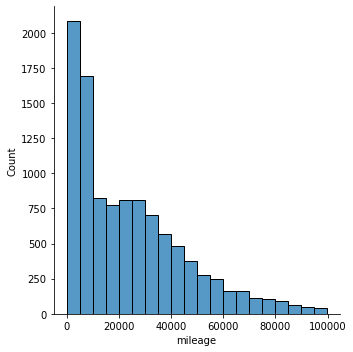

In [34]:
sns.displot(df.mileage,bins=20)

In [35]:
df.shape

(10424, 9)

In [36]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

<AxesSubplot:>

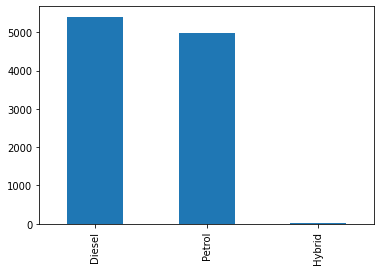

In [37]:
df.fuelType.value_counts().plot(kind='bar')

In [38]:
df = df[-(df.fuelType == 'Hybrid')]

In [39]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


In [40]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10397.000000,10397.000000,10397.000000,10397.000000,10397.000000,10397.000000
mean,2017.157161,22487.815524,23905.244013,125.550159,50.691421,1.909426
std,2.000317,9949.151682,21286.468283,65.815103,11.623350,0.569368
min,2006.000000,3450.000000,5.000000,0.000000,19.600000,0.000000
25%,2016.000000,15450.000000,5985.000000,125.000000,40.900000,1.500000
50%,2017.000000,20250.000000,18900.000000,145.000000,49.600000,2.000000
75%,2019.000000,27900.000000,35905.000000,145.000000,58.900000,2.000000
max,2020.000000,59990.000000,99590.000000,580.000000,156.900000,6.300000


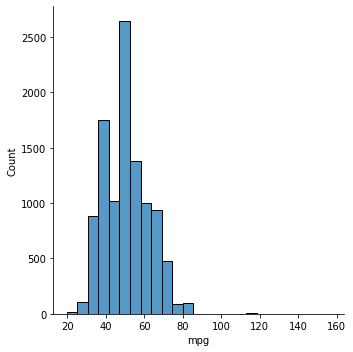

In [41]:
sns.displot(df.mpg,bins=25)

In [42]:
df.mpg.quantile(0.99)

76.4

In [43]:
df = df[-(df.mpg > 85)]

In [44]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


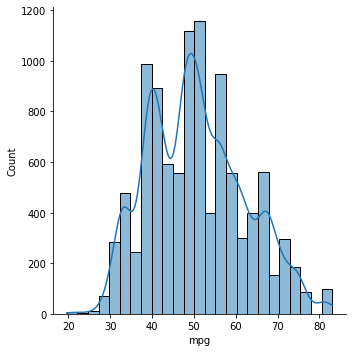

In [45]:
sns.displot(df.mpg,bins=25,kde=True)

In [46]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [47]:
df.engineSize.nunique()

19

In [48]:
df.engineSize.value_counts()

2.0    5076
1.4    1574
3.0    1095
1.6     899
1.5     744
1.0     558
1.8     120
4.0     112
2.5      58
0.0      53
2.9      38
1.2      31
4.2      20
3.2       4
2.7       3
5.2       3
4.1       2
6.3       1
1.9       1
Name: engineSize, dtype: int64

In [49]:
df  = df[(df.engineSize != 1.9)&(df.engineSize != 6.3)&(df.engineSize != 4.1)&(df.engineSize != 5.2)&(df.engineSize != 2.7)&(df.engineSize != 3.2)]

In [50]:
df.shape

(10378, 9)

In [51]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Exploratory Data Analysis

#### Questions

Question 1: Which Model of car is more frequent in data?

In [52]:
df.model.value_counts().head(1)

A3    1865
Name: model, dtype: int64

Answer 1: Audi A3 is more Frequent in Data (about 1865 times)

--------------------------------------------------------------------------

Question 2: Find the Mean Price of Audi Q3?

In [53]:
Q3 = df.groupby('model').get_group('Q3')
Q3.price.mean()

23036.276716206652

Answer 2: Audi Q3 mean price is 23036 Pounds

--------------------------------------------------------

Question 3: Compare the Audi A3,A1,Q3,A6,Q5,A4 models Prices of 2015?

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2015 Price Comparison'}>

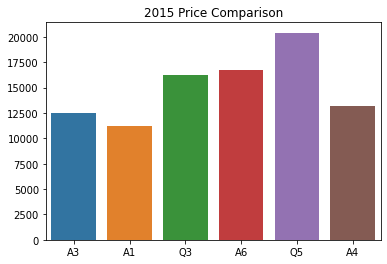

In [54]:
models = ['A3','A1','Q3','A6','Q5','A4']
prices = []
year = df.groupby('year').get_group(2015)
for i in models:
    val = year['price'][year.model == i].mean()
    prices.append(val)
plt.title('2015 Price Comparison')
sns.barplot(models,prices)

Answer 3: if we classify into ranks, Audi Q5, Audi A6, and Audi Q3 are top 3 in ranks, respectively. while Audi A1 is least in mean price

----------------------------------------

Question 4: Analyze "Transmission" and "Fuel Type" deeply and make insights and details?

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


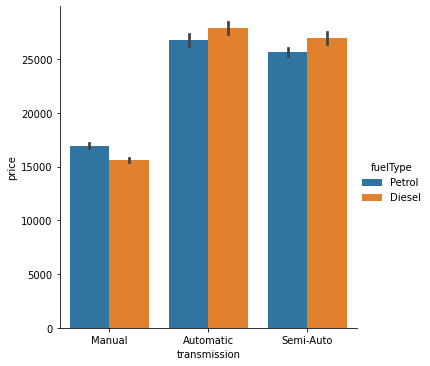

In [55]:
sns.catplot('transmission','price',data=df,kind='bar',hue='fuelType')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


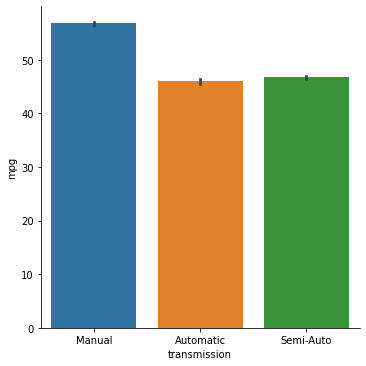

In [56]:
sns.catplot('transmission','mpg',data=df,kind='bar')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


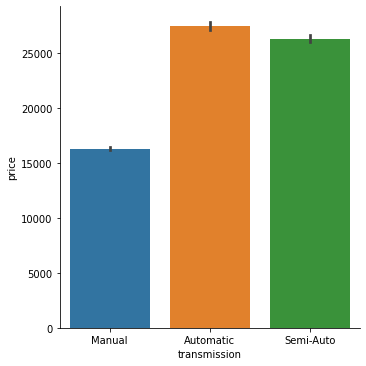

In [57]:
sns.catplot('transmission','price',data=df,kind='bar')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


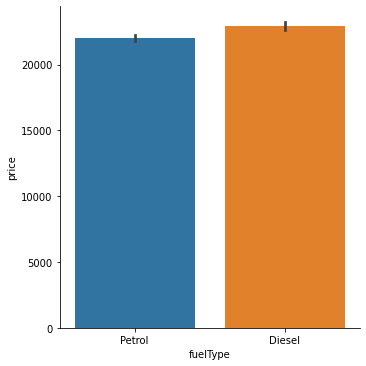

In [58]:
sns.catplot('fuelType','price',data=df,kind='bar')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


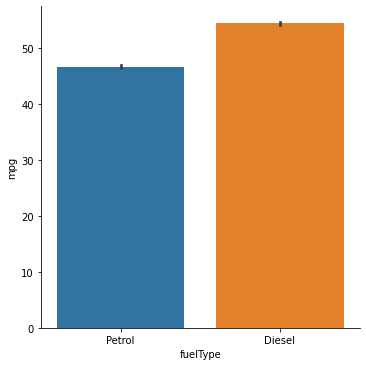

In [59]:
sns.catplot('fuelType','mpg',data=df,kind='bar')

Answer 4: 

"Transmission" of model are of three types ("Manual","Automatic","Semi-Auto"), Manual Transmission are less costly then Automatic Transmission, but Most Good in Fuel Economy than All Transmission.

"Fuel Type" are of two types ("Petrol","Diesel"), Diesel Vehicles are most Costly but also giving good fuel economy.

-----------------------------------------------------------------------------------

Question 5: Find the Correletion between different Variables? and Find variable Negatively Correlated with price?

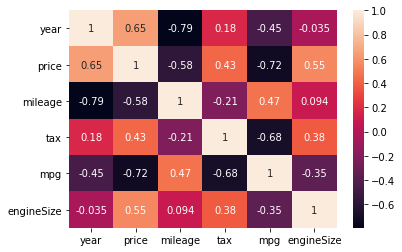

In [60]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

Answer 5: The Negatively Correleted Variables with price are given below:

            mileage  ---     -0.79
            mpg      ---     -0.58

-----------

### Data Visualization

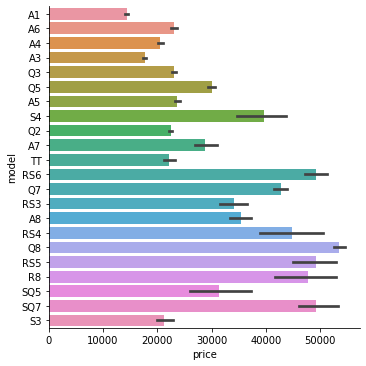

In [61]:
sns.catplot(y = 'model',x ='price',data=df,kind='bar')
plt.show()

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


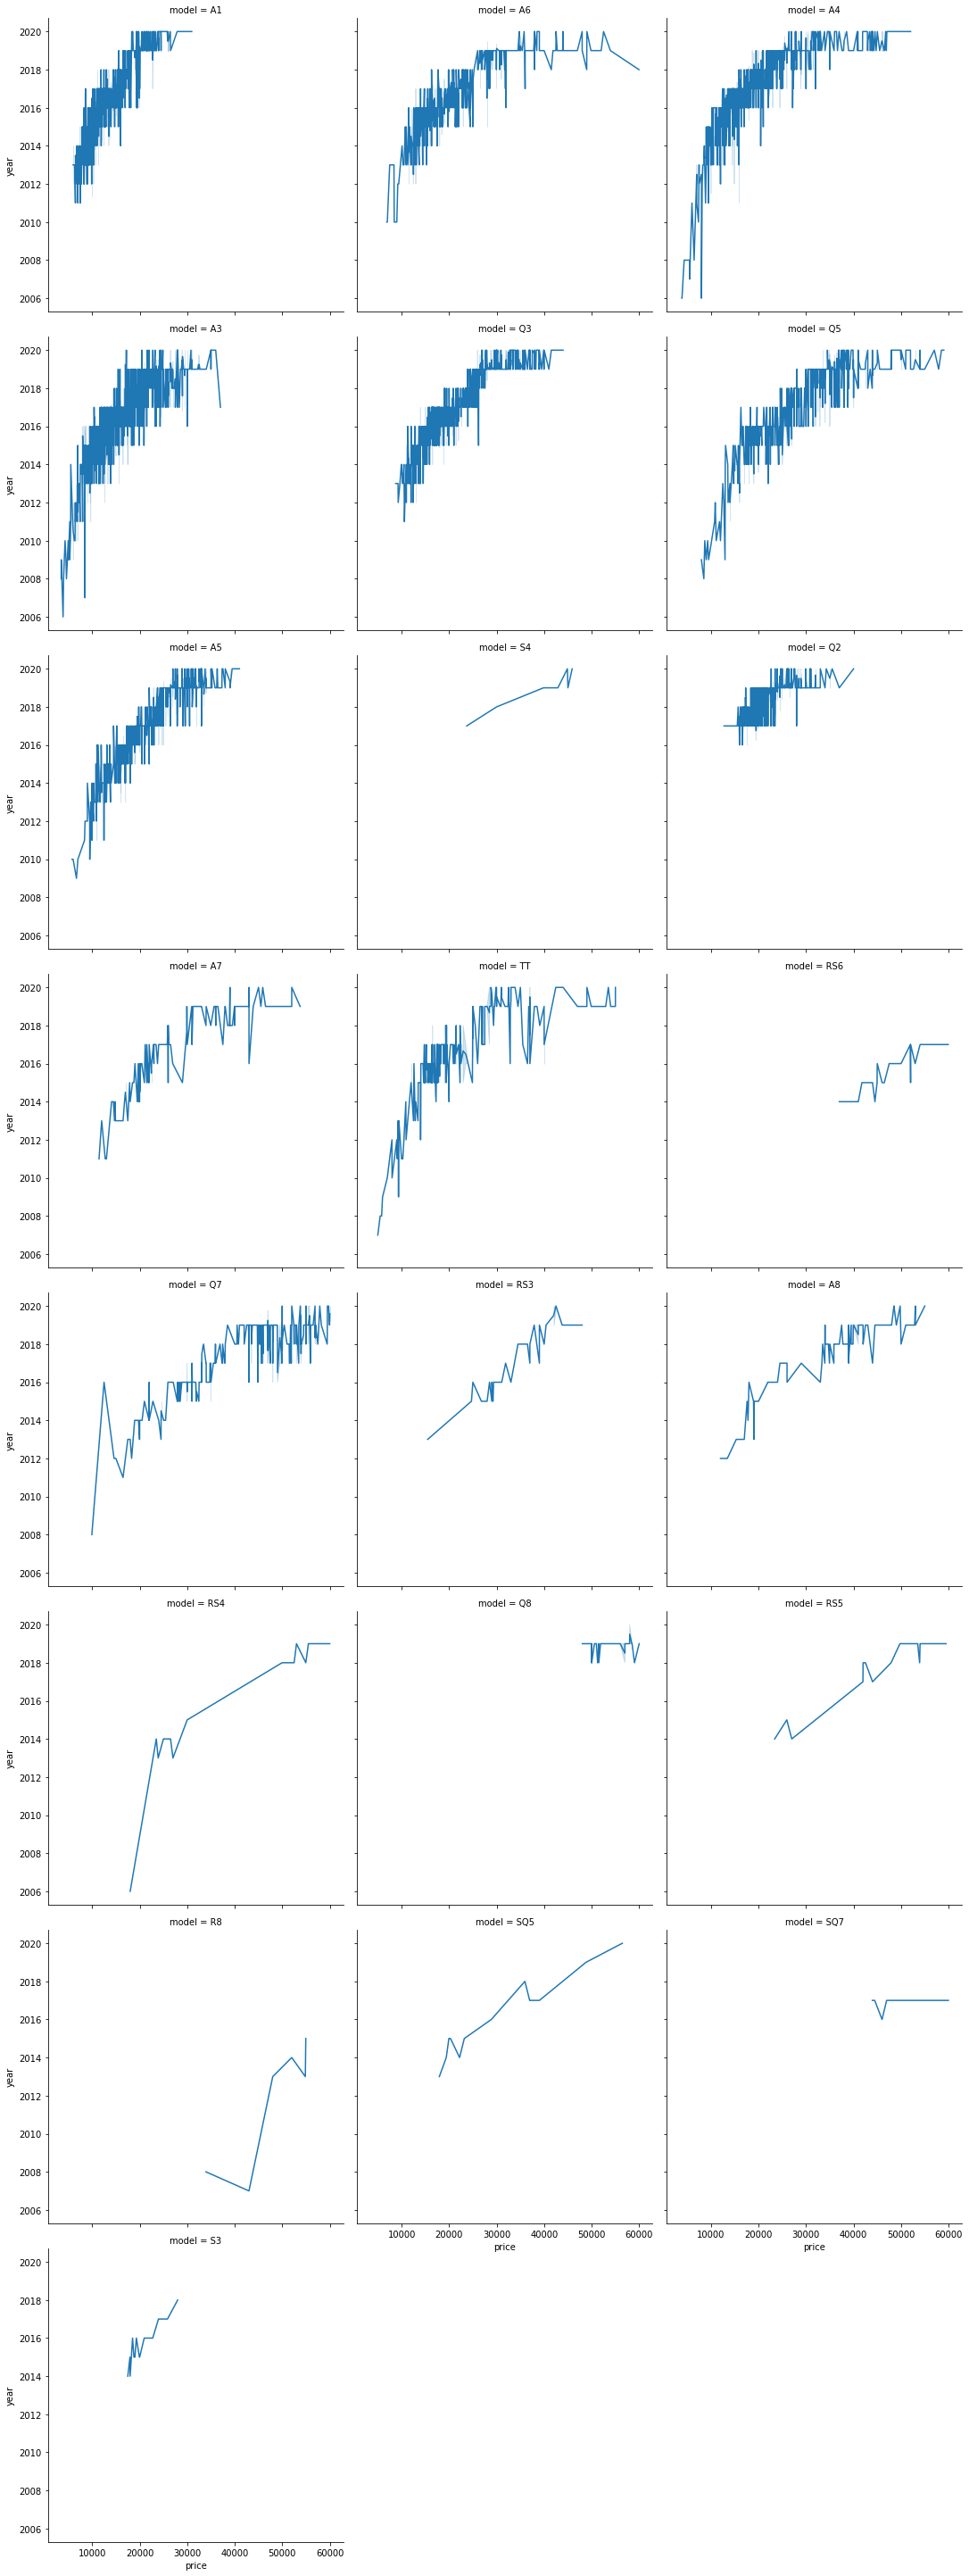

In [62]:
sns.relplot('price','year',data=df,col='model',kind='line',col_wrap=3,)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


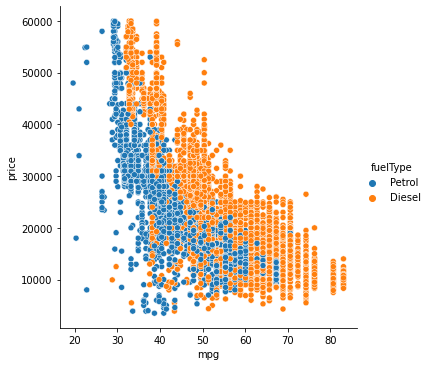

In [63]:
sns.relplot('mpg','price',data=df,hue='fuelType')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='fuelType'>

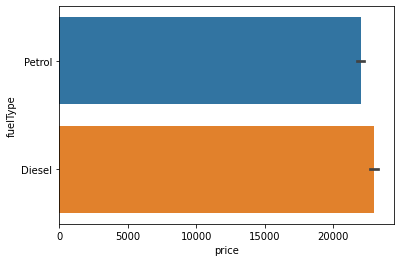

In [64]:
sns.barplot('price','fuelType',data=df)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


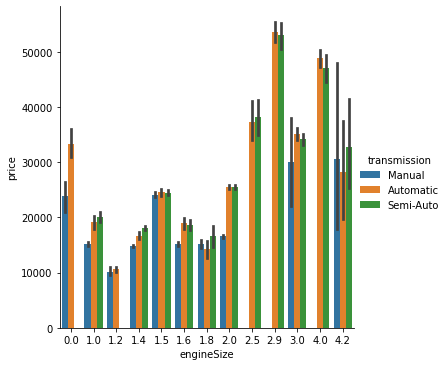

In [65]:
sns.catplot('engineSize','price',data=df,hue='transmission',kind='bar')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


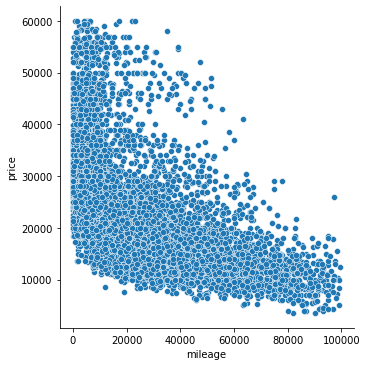

In [66]:
sns.relplot('mileage','price',data=df)

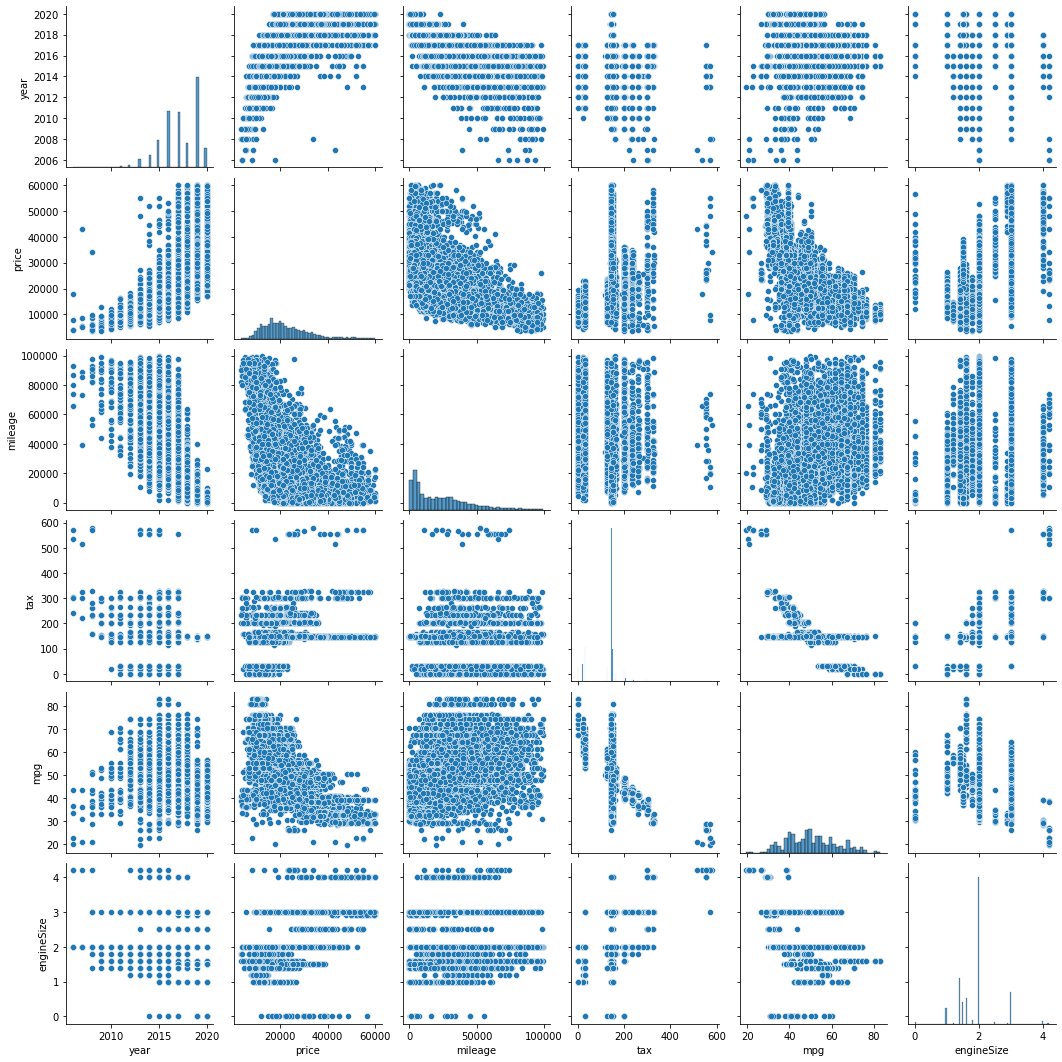

In [67]:
sns.pairplot(df)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


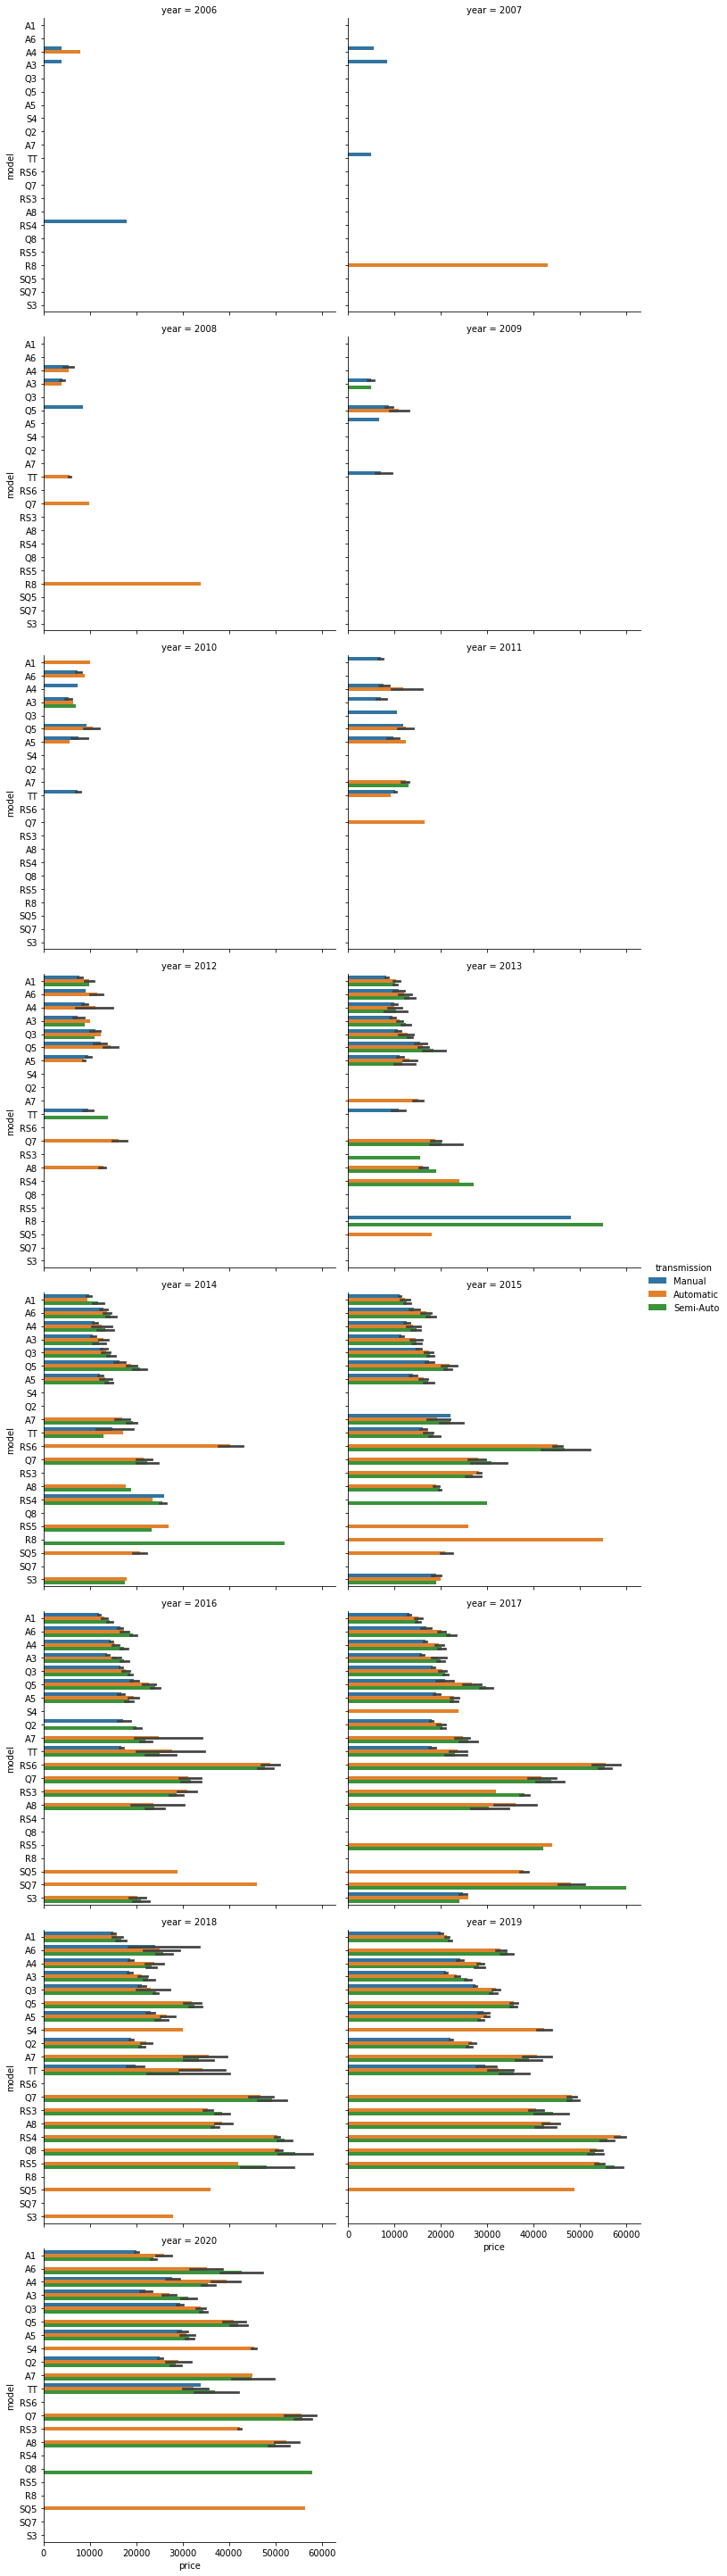

In [68]:
sns.catplot('price','model',data=df,kind='bar',col='year',col_wrap=2,hue='transmission')

# The End